 * Pregnancies = การตั้งครรถ์
 * Glucose = น้ำตาล
 * BloodPressure = ความดันเลือด
 * SkinThickness = ความหนาผิวหนัง
 * Insuline = ฮอร์โมนจากตับ
 * BMI = ค่าน้ำหนักมวลกาย
 * Age = อายุ
 * Outcome = ผลวิจัยว่าเป็นโรคไหม

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(r'Downloads\diabetes.csv')

In [5]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [23]:
x = df[df.columns[0:8]].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [25]:
y = df['Outcome'].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

### การกำหนดการหาค่า K เพื่อให้โมเดลมีความแม่นยำที่สุด

In [79]:
k_neighbors=np.arange(1,9)
k_neighbors

array([1, 2, 3, 4, 5, 6, 7, 8])

In [80]:
train_score = np.empty(len(k_neighbors))
test_score = np.empty(len(k_neighbors))
for i,k in enumerate(k_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_score[i] = knn.score(x_train,y_train)
    test_score[i] = knn.score(x_test,y_test) 

C:\Users\chopp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\chopp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Score')

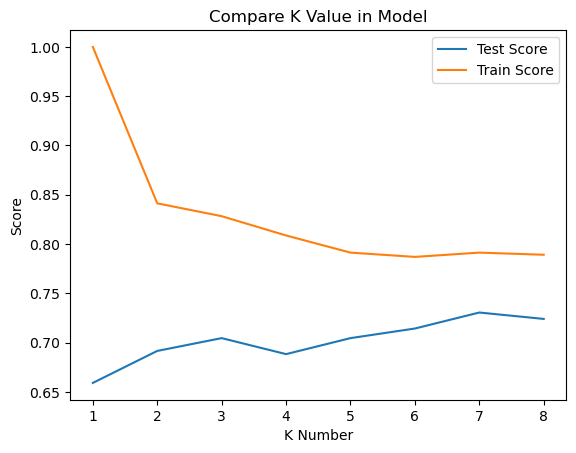

In [112]:
plt.title('Compare K Value in Model')
plt.plot(k_neighbors,test_score,label='Test Score')
plt.plot(k_neighbors,train_score,label='Train Score')
plt.legend()
plt.xlabel('K Number')
plt.ylabel('Score')

In [82]:
print('Test Score:',test_score*100)

Test Score: [65.90909091 69.15584416 70.45454545 68.83116883 70.45454545 71.42857143
 73.05194805 72.4025974 ]


## เราจะเห็นได้ว่า ที่ K = 6,7,8 แล้วแต่ตัว Train จะทำให็โมเดลของเรานั้นมี ประสิทธิภาพสูงที่สุด

In [113]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [114]:
pred = knn.predict(x_test)

C:\Users\chopp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [115]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       199
           1       0.69      0.44      0.54       109

    accuracy                           0.73       308
   macro avg       0.71      0.66      0.67       308
weighted avg       0.72      0.73      0.71       308



In [125]:
pd.crosstab(y_test,pred,rownames=['True'],colnames=['Prediction'],margins=True)

Prediction,0,1,All
True,,,
0,177,22,199
1,61,48,109
All,238,70,308


In [118]:
cm = confusion_matrix(y_test,pred)

[Text(0, 0.5, 'Normally'), Text(0, 1.5, 'Risk')]

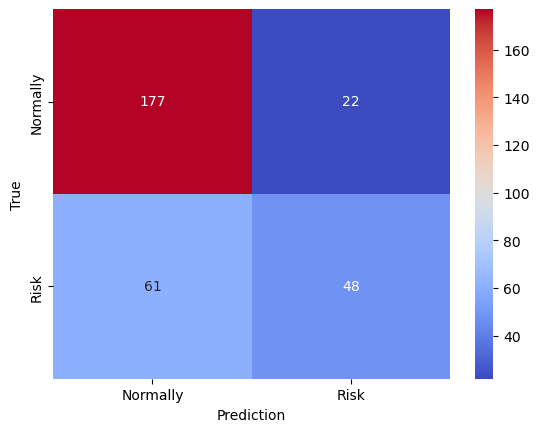

In [136]:
ax = sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm')
ax.set_xlabel('Prediction')
ax.set_ylabel('True')
ax.xaxis.set_ticklabels(['Normally','Risk']);ax.yaxis.set_ticklabels(['Normally','Risk'])